# Zadaća 3
##### Rok za predaju: 17. ožujka, 2021. u 23:59h
##### Način predaje: Teams->Strojno učenje->Assignment, predajete.ipynb datoteka (ili više datoteki u .zip) ili link na Google colab 

### Ime i prezime: Borna Gajić

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split

## Zadatak 1 (10):
Učitajte podatke iz prošle zadaće (*X\_a i y\_a te X\_b i y\_b*) te nove
podatke *X\_c i y\_c*.
Postavite *SVM* modele koje ćete učiti na učitanim podacima.
Koristite ugrađene klase iz modula *sklearn.svm*. Pratite sljedeće
upute:

1.  Primijenite model SVC s linearnom jezgrenom funkcijom na učitane
    podatke

2.  Ispišite koeficijente $\theta_0$ i $\theta$.

3.  Ispišite potporne vektore.

4.  Izračunajte širinu dobivene margine.

5.  Grafički prikažite podatke, dobivenu hiperravninu koja razdvaja
    podatke i potporne vektore.

6.  Usporedite rezultate iz prošle zadaće s ovom. Odgovorite - u kakvom
    su odnosu dobivene vrijednosti margina u prošloj zadaći i ovoj?

( Učinite to za podatke X\_a, podatke X\_b i X\_c. )

Odaberite jedan od dva skupa podataka (X\_a ili podatke X\_b). Što će se
dogoditi ako iz njega maknete određeni dio podataka? Koristeći
*numpy.random.choice* (ili bilo koju drugu metodu), nasumično odaberite
1000 podataka te na njima ponovite gornji postupak. Usporedite rezultate
s gore dobivenim (parametre, margine, potporne vektore). Što možete
zaključiti o ulozi potpornih vektora?

- Implementirajte funkciju hinge(x, y) koja računa broj krivo određenih
predikcija modela za skup podataka $x$. 
- Testirajte funkciju na vlastitom primjeru (od npr. $4-5$ podataka). 
- Sada proučite ugrađenu hinge\_loss
funkciju
[[Link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html#sklearn.metrics.hinge_loss)]
te ju pokrenite na primjeru kojeg ste odabrali, rezultati vam se moraju
poklapati. 
- Također, pokrenite vašu funkciju na nekom od SVC modela koje
ste implementirali prethodno u zadatku i ispišite dobiveni rezultat.

In [3]:
X_a = pd.read_csv('./Podaci/X_a.csv').to_numpy()
y_a = pd.read_csv('./Podaci/y_a.csv').to_numpy()
X_b = pd.read_csv('./Podaci/X_b.csv').to_numpy()
y_b = pd.read_csv('./Podaci/y_b.csv').to_numpy()
X_c = pd.read_csv('./Podaci/X_c.csv').to_numpy()
y_c = pd.read_csv('./Podaci/y_c.csv').to_numpy()

# Model trained on X_a, y_a
model_a = SVC(kernel = 'linear')
model_a.fit(X_a, np.ravel(y_a))

# Model trained on X_b, y_b
model_b = SVC(kernel = 'linear')
model_b.fit(X_b, np.ravel(y_b))

# Model trained on X_c, y_c
model_c = SVC(kernel = 'linear')
model_c.fit(X_c, np.ravel(y_c))

SVC(kernel='linear')

Koeficijenti

In [16]:
print("Model A: ", model_a.coef_)
print("Model B: ", model_b.coef_)
print("Model C: ", model_c.coef_)

Model A:  [[-0.50341657  0.50338949]]
Model B:  [[-0.16160019  0.1615812 ]]
Model C:  [[-0.28496183  0.32870287]]


Potporni vektori

In [20]:
print("Model A: \n", model_a.support_vectors_)
print("Model B: \n", model_b.support_vectors_)
print("Model C: \n", model_c.support_vectors_)

Model A: 
 [[ 6.41636799  6.42930926]
 [19.29938341 19.31301455]
 [ 5.00644063  8.99314232]
 [ 5.72973428  9.71630369]
 [13.43259782 17.41947595]
 [12.65785892 16.64416419]]
Model B: 
 [[13.07287283  9.3862776 ]
 [ 7.66758227  3.97609536]
 [15.76276173 12.07636037]
 [ 7.55536057 16.24252895]
 [11.41787863 20.10450994]]
Model C: 
 [[ 3.11384486  1.18855273]
 [ 3.10088663  0.45410078]
 [ 6.94217467  3.72313211]
 [ 3.56904562  0.69524978]
 [ 7.63503956  4.28197211]
 [ 1.40702286  7.7114211 ]
 [ 1.98775873  7.52002018]
 [ 0.36031614  7.19260243]
 [ 9.26326061 11.18855273]
 [ 7.80731493 10.45410078]
 [ 2.78282209  5.58306498]
 [ 4.87258042  7.27146905]
 [ 2.35800137  5.73196542]
 [ 4.3700238   6.70151827]
 [ 0.01581934 -2.2885789 ]
 [-0.94771838 -2.47997982]
 [ 0.02488871 -2.80739757]]


Širina dobivene margine

In [22]:
def margin (coef: np.array):
    return 1 / np.sqrt(np.sum(coef ** 2))

print("Margina za model A: ", margin(model_a.coef_))
print("Margina za model B: ", margin(model_b.coef_))
print("Margina za model C: ", margin(model_c.coef_))

Margina za model A:  1.404653398622454
Margina za model B:  4.375912645121258
Margina za model C:  2.2987058850853916


Grafički prikaz:
 * Podaci A

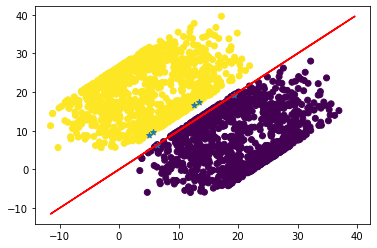

In [41]:
theta_a = np.ravel(model_a.coef_)

plt.scatter(X_a[:, 0], X_a[:, 1], c = y_a)
plt.plot(X_a, -theta_a[0]/theta_a[1] * X_a, c = 'r')
plt.scatter(model_a.support_vectors_[:, 0], model_a.support_vectors_[:, 1], marker='*')
plt.show()

 * Podaci B

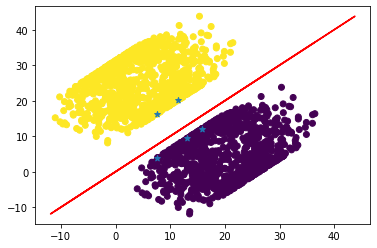

In [42]:
theta_b = np.ravel(model_b.coef_)

plt.scatter(X_b[:, 0], X_b[:, 1], c = y_b)
plt.plot(X_b, -theta_b[0]/theta_b[1] * X_b, c = 'r')
plt.scatter(model_b.support_vectors_[:, 0], model_b.support_vectors_[:, 1], marker='*')
plt.show()

 * Podaci C

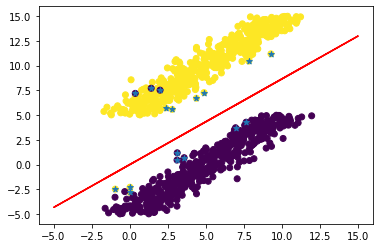

In [43]:
theta_c = np.ravel(model_c.coef_)

plt.scatter(X_c[:, 0], X_c[:, 1], c = y_c)
plt.plot(X_c, -theta_c[0]/theta_c[1] * X_c, c = 'r')
plt.scatter(model_c.support_vectors_[:, 0], model_c.support_vectors_[:, 1], marker='*')
plt.show()

Random 1000 podataka iz skupa podataka X_a

In [73]:
rand_idx_X_a = np.random.choice(np.arange(len(X_a)), 1000)

rand_X_a = np.array([X_a[i] for i in rand_idx_X_a])
rand_y_a = np.array([y_a[i] for i in rand_idx_X_a])

rand_model_a = SVC(kernel = 'linear')
rand_model_a.fit(rand_X_a, np.ravel(rand_y_a))

rand_theta_a = np.ravel(rand_model_a.coef_)

Margina i potporni vektori

In [78]:
print("Margina od random skupa podataka iz X_a: ", margin(rand_theta_a.reshape(1, -1)))
print("Potporni vektori za isti skup: \n", rand_model_a.support_vectors_)

Margina od random skupa podataka iz X_a:  1.404767503535949
Potporni vektori za isti skup: 
 [[ 9.29415813  9.30681442]
 [16.72035021 16.7332207 ]
 [ 7.45643785 11.44281932]
 [13.43259782 17.41947595]]


Grafički prikaz

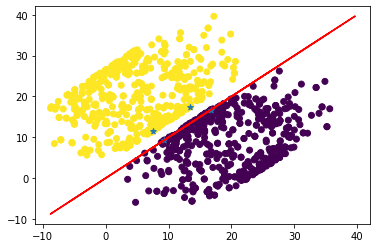

In [74]:
plt.scatter(rand_X_a[:, 0], rand_X_a[:, 1], c = rand_y_a)
plt.plot(rand_X_a, -rand_theta_a[0]/rand_theta_a[1] * rand_X_a, c = 'r')
plt.scatter(rand_model_a.support_vectors_[:, 0], rand_model_a.support_vectors_[:, 1], marker='*')
plt.show()

In [179]:
def hinge(y, y_pred):
    losses = np.maximum(0, 1 - (y * y_pred))
    np.clip(losses, 0, None, out = losses)
    return np.average(losses)

# Test
y = np.array([1, 1, -1, -1])
y_pred = np.array([-2.8, -1.5, 1.5, 1.7])

print("Vlastita implementacija za broj krivo određenih predikcija modela: ", hinge(y, y_pred))
print("scikit learn implementacija hinge_loss: ", sklearn.metrics.hinge_loss(y, y_pred))

Vlastita implementacija za broj krivo određenih predikcija modela:  2.875
scikit learn implementacija hinge_loss:  2.875


hinge loss na rand_model_a 

In [180]:
print("Vlastiti hinge loss na rand_model_a modelu: ", hinge(rand_y_a, rand_model_a.decision_function(rand_X_a)))

Vlastiti hinge loss na rand_model_a modelu:  3.746142913876187


---
## Zadatak 2 (5)

Učitajte podatke *X\_d, y\_d*. Koristeći ugrađeni model SMV-a
klasificirajte učitane podatke. Ispišite dobivene koeficijente i
izračunajte širinu dobivene margine.\
Grafički prikažite podatke i dobivenu hiperravninu. Među podacima možete
uočiti stršeće vrijednosti, kako one utječu na SVM?

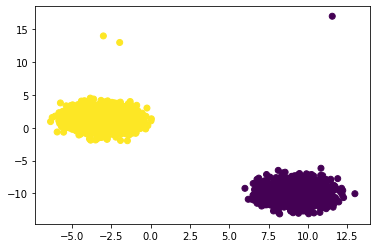

In [184]:
X_d = pd.read_csv('./Podaci/X_d.csv').to_numpy()
y_d = pd.read_csv('./Podaci/y_d.csv').to_numpy()

plt.scatter(X_d[:, 0], X_d[:, 1], c = y_d)
plt.show()

treniranje SVM model od skupa podataka X_d, y_d

In [188]:
model_d = SVC(kernel = 'linear')
model_d.fit(X_d, np.ravel(y_d))

print("Koeficijenti modela: ", model_d.coef_)
print("Širina margine: ", margin(model_d.coef_))

Koeficijenti modela:  [[-0.2459079   0.05197027]]
Širina margine:  3.9786802512978436


Grafički prikaz

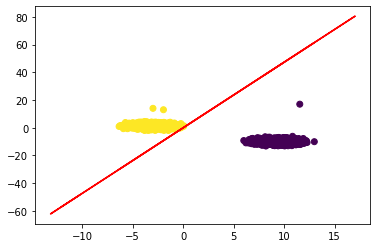

In [197]:
theta_d = np.ravel(model_d.coef_)

plt.scatter(X_d[:, 0], X_d[:, 1], c = y_d)
plt.plot(X_d, -theta_d[0]/theta_d[1] * X_d, c = 'r')
plt.show()

Model se jako pomaknuo prema podacima obojanima u žuto

---
## Zadatak 3 (10):
Učitajte podatke *X\_e, y\_e*. 
- Podijelite skup primjera na skup za učenje i skup za testiranje u omjeru 80%:20%. 
- Trenirajte SVM model na podacima za učenje, zatim ispišite dobivene koeficijente i izračunajte širinu dobivene margine.
- Ispitajte točnost modela na skupu za testiranje koristeći prethodno implementiranu hinge funkciju. Postupak ponovite više puta (npr. 10) te uprosječite rezultate.
- Kao i u prethodnim zadacima grafički prikažite podatke i dobivenu hiperravninu. 
- Možete primijetiti kako ovi podaci nisu linearno separabilni, kako to utječe na SVM?

In [207]:
X_e = pd.read_csv('./Podaci/X_e.csv').to_numpy()
y_e = pd.read_csv('./Podaci/y_e.csv').to_numpy()

X_e_train, X_e_test, y_e_train, y_e_test = train_test_split(X_e, y_e, test_size = 0.2, shuffle = True, random_state = 42)

In [218]:
model_e = SVC(kernel = 'linear')
model_e.fit(X_e_train, np.ravel(y_e_train))

print("Koeficijenti modela: ", model_e.coef_)
print("Margine modela: ", margin(model_e.coef_))
print("Hinge loss na testnim podacima: ", hinge(y_e_test, model_e.decision_function(X_e_test)))

Koeficijenti modela:  [[-1.6571445  -1.93053052]]
Margine modela:  0.39304714630708004
Hinge loss na testnim podacima:  1.5179825991826865


Grafički prikaz

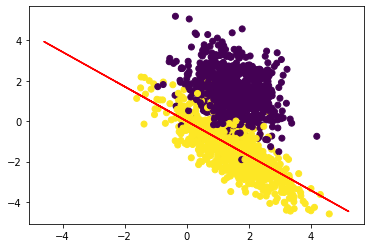

In [216]:
theta_e = np.ravel(model_e.coef_)

plt.scatter(X_e_train[:, 0], X_e_train[:, 1], c = y_e_train)
plt.plot(X_e_train, -theta_e[0]/theta_e[1] * X_e_train, c = 'r')
plt.show()

---
## Zadatak 4 (5):
Neka je zadana funkcija $g(z) = \frac{1}{1+e^{-z}}$. Pokažite kako je
$1-g(z) = g(-z)$.

$1-g(z) = g(-z)$  
$1 - \dfrac{1}{1+e^{-z}} = \dfrac{1}{1+e^{z}}$  
$\dfrac{1+e^{-z}}{1+e^{-z}} - \dfrac{1}{1+e^{-z}} = \dfrac{1}{1+e^{z}}$  
$\dfrac{e^{-z}}{1+e^{-z}} = \dfrac{1}{1+e^{z}}$  
$\dfrac{1}{e^{z} \cdot 1 + e^{-z} \cdot e^{-z}} = \dfrac{1}{1+e^{z}}$  
$\dfrac{1}{1+e^{z}} = \dfrac{1}{1+e^{z}}$  
$0 = 0$  
Pokazali smo da vrijedi jednakost

---
## Zadatak 5 (10):
Izračunajte gradijent *maximum likelihood* kriterijske funkcije koju ste
vidjeli na predavanju.

Neka su $x = (1, x_1, x_2, \dots, x_n)^T, y = (y_1, y_2, \dots, y_m)^T, \theta = (\theta_0, \theta_1, \dots, \theta_n)^T$ pri čemu su $x, y \in \mathbb{R}^n$, a $y \in \mathbb{R}^m$, $n, m \in \mathbb{N}$

Definiramo _maximum likelihood_ kriterijsku funkciju:
$J(\theta) = \displaystyle\sum_{i=1}^{m} log(1 + e^{-y^{(i)} \cdot \theta^T \cdot x^{(i)}})$  
I gradijent:
$\nabla J(\theta) = \left(\dfrac{\partial J(\theta)}{\partial \theta_0}, \dfrac{\partial J(\theta)}{\partial \theta_1}, \dots, \dfrac{\partial J(\theta)}{\partial \theta_n}\right)^T$  

$\dfrac{\partial J(\theta)}{\partial \theta_j} = \dfrac{\partial}{\partial \theta_j}\displaystyle\sum_{i=1}^{m} log(1 + e^{-y^{(i)} \cdot \theta^T \cdot x^{(i)}}) = \displaystyle\sum_{i=1}^{m} \dfrac{1}{1 + e^{-y^{(i)} \cdot \theta^T \cdot x^{(i)}}} \cdot e^{-y^{(i)}\cdot \theta^T \cdot x^{(i)}} \cdot -y^{(i)} \cdot x_j^{(i)} = \displaystyle\sum_{i=1}^{m} -\dfrac{y^{(i)} \cdot x_j^{(i)}}{1 + e^{-y^{(i)} \cdot \theta^T \cdot x^{(i)}}}$  

Što implicira:  
$\implies \dfrac{\partial J(\theta)}{\partial \theta} = -\dfrac{y \cdot x}{1 + e^{-y \cdot \theta^T \cdot x}}$

---
## Zadatak 6 (10+10):

Neka su zadani podaci $X\in \mathbb{R}^{m\times n}$ i pripadne izlazne vrijednosti $y\in\mathbb{R}^{m\times (k-1)}$ koje označavaju pripadnost nekog podatka jednoj od klasa $0, 1, \cdots, k-1$. Na ovim podacima možemo provesti proces učenja klasifikacijskog modela. Jedan od takvh modela je logistička regresija. <br>
Logistička regresija kao model funkciju koristi $h_{\theta}(x) = \frac{1}{1+e^{-\theta ^T x}}$, gdje su $\theta$ parametri koje model uči. <br>
Znamo kako se učenje svodi na minimizaciju funkcije $J(\theta) = \frac{1}{m}\sum\limits_{i=1}^m [-y^{(i)}\log{(h_{\theta}(x^{(i)}))} - (1-y^{(i)})\log{(1-h_{\theta}(x^{(i)}))}]$ te kako do rješenje tog minimizacijskog problema možemo doći gradijentnom metodom. <br>

1. Implementirajte gradijentnu metodu za slučaj binarne klasifikacije ($k=2$). Neka vaša funkcija koja pokreće gradijentnu metodu kao argumente prima stopu učenja $\alpha$ i broj iteracija metode.
2. Isprobajte implementiranu funkciju na podacima $X_a, y_a$. Odaberite proizvoljno stopu učenja $\alpha$ i broj iteracija. 
3. Isprobajte implementiranu funkciju na podacima $X_c,y_c$ Kako se logistička regresija ponaša prema podacima koji imaju stršeće vrijednosti?
   Hiperparametre $\alpha$ i broj iteracija odredite koristeći metodu *pretraživanja rešetke*. Napravite rešetku koja će biti definirama vrijednostima $\alpha$, npr. između $0.0001, 0.1$ i brojem iteracija između $100,200$. Za svaki par hiperparametara izračunajte točnost modela (accuracy) i odaberite onaj model s najvećom točnošću. 
4. Isprobajte implementiranu funkciju na podacima $X_d,y_d$. Dodatno nacrtajte graf promjene funkcije cilja kroz iteracije. Opišite dobiveni graf. 


Accuracy koristite kao što je navedeno: `https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html`

Gradijentna metoda:

In [4]:
def gradient_method (X, Y, alpha, numIter, draw = False): 
    m, n = X.shape
    theta = np.zeros((n, 1))
    
    for i in range(numIter):
        B = -Y * X
        N = np.exp((Y * theta.T * X).sum(axis = 1)).reshape(-1, 1)

        gradJ = (B / (N + 1)).sum(axis = 0).reshape(-1, 1)
        theta = theta - alpha * gradJ 
        
        if draw == True and i % 10 == 0:
            plt.scatter(X[:, 0], X[:, 1], c = Y)
            plt.plot(X, -theta[0]/theta[1] * X, c = 'r')
            plt.show()
        
    return theta

Treniranje nad skupom podataka X_a, y_a

In [236]:
my_theta = gradient_method(X_a, y_a, 0.001, 1000)

In [243]:
print("Dobiveni koeficijenti: ", my_theta.reshape(1, -1))

Dobiveni koeficijenti:  [[-7.15859769  6.23951473]]


Grafički prikaz

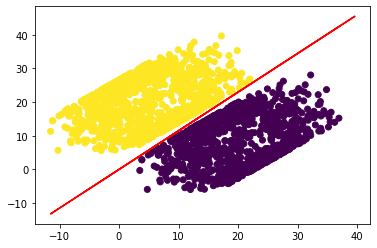

In [240]:
plt.scatter(X_a[:, 0], X_a[:, 1], c = y_a)
plt.plot(X_a, -my_theta[0]/my_theta[1] * X_a, c = 'r')
plt.show()

Treniranje nad skupom podataka X_c, y_c

In [7]:
my_theta_c = gradient_method(X_c, y_c, 0.0001, 1000)

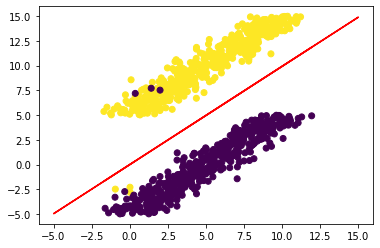

In [14]:
plt.scatter(X_c[:, 0], X_c[:, 1], c = y_c)
plt.plot(X_c, -my_theta_c[0]/my_theta_c[1] * X_c, c = 'r')
plt.show()

Nema lošeg učinka zbog stršećih vrijednosti

Razdvojiti ću podatke na podatke za učenje i testiranje, te odabrati onu kombinaciju parametara alfe i broja koraka koja je najbolja za moj model

In [57]:
def my_decision_function (theta, X):
    return np.sign((theta.T * X).sum(axis = 1))


X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size = 0.2, shuffle = True, random_state = 42)

alpha_array = np.array([0.001, 0.0001, 0.00001, 0.00001, 0.0000001])
steps_array = np.array([100, 150, 200])

best_theta = np.zeros(2)
best_alpha = 0
best_steps = 0
best_score = 0

for i in alpha_array:
    for j in steps_array:
        theta = gradient_method(X_c_train, y_c_train, i, j)
        score = sklearn.metrics.accuracy_score(y_c_test, my_decision_function(theta, X_c_test))
        
        if score > best_score:
            best_theta = theta
            best_alpha = i
            best_steps = j
            best_score = score

Najbolji parametri za podatke X_c i y_c su

In [58]:
print("Theta: \n", best_theta)
print("Alfa: ", best_alpha)
print("Broj koraka: ", best_steps)

Theta: 
 [[-1.19059152]
 [ 1.19715742]]
Alfa:  0.001
Broj koraka:  100


Treniranje modela nad skupom podataka X_d, y_d

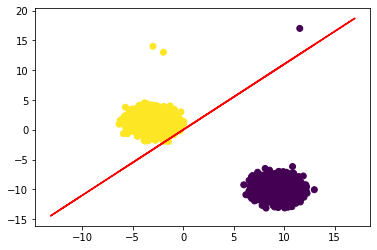

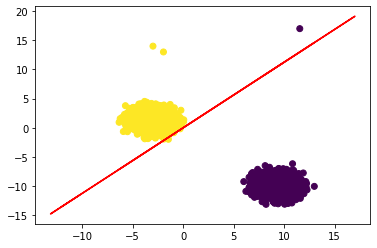

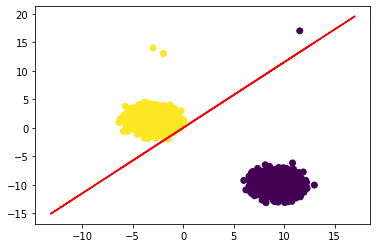

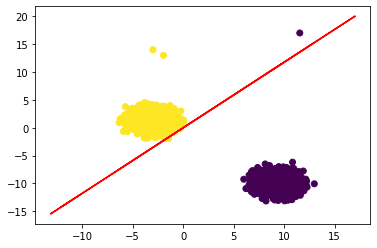

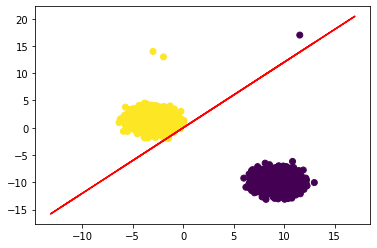

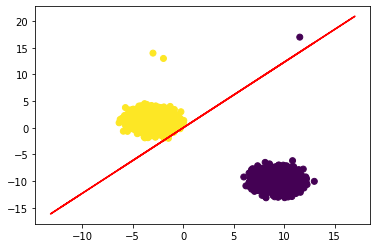

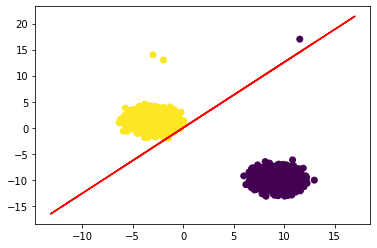

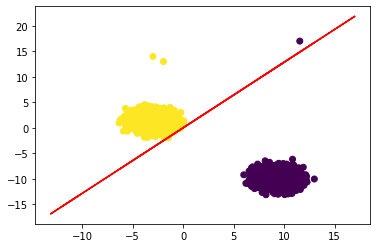

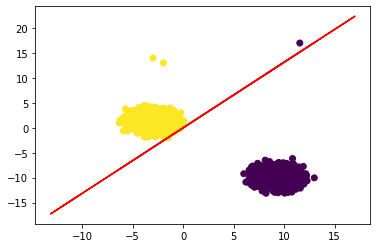

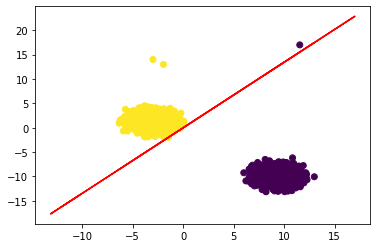

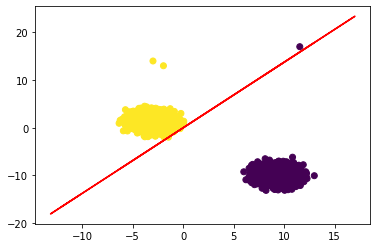

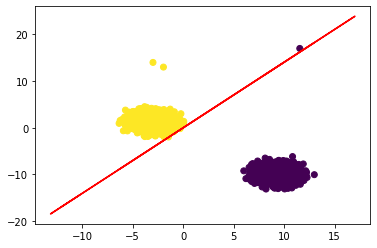

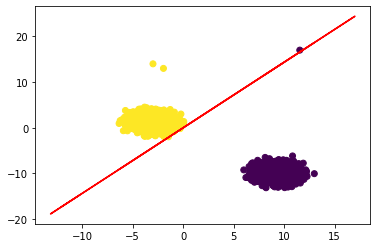

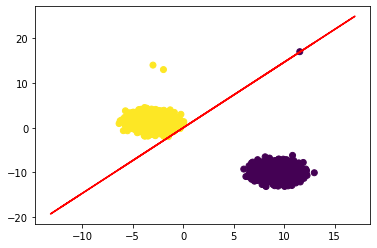

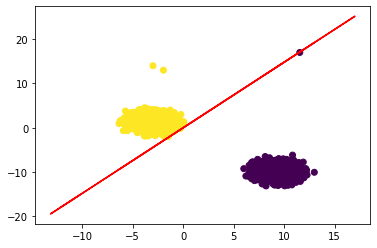

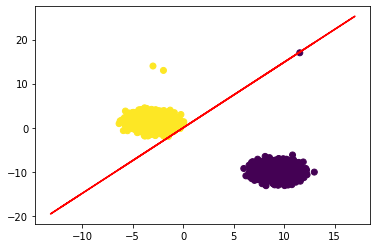

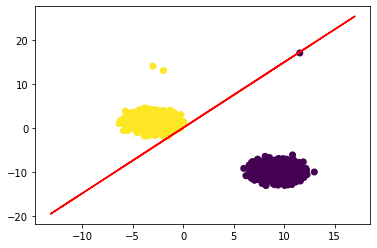

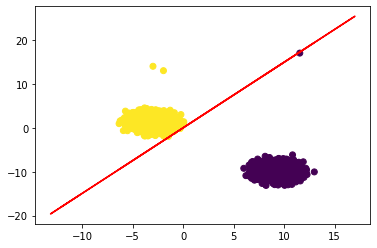

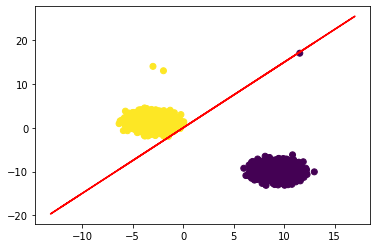

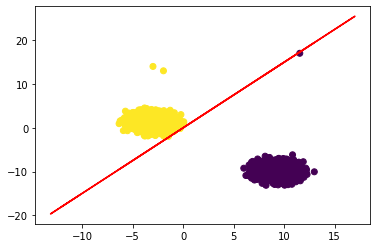

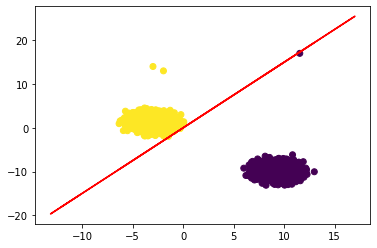

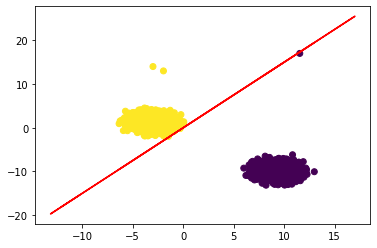

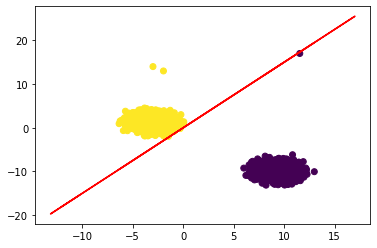

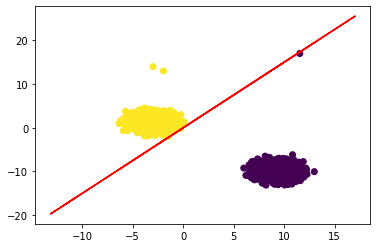

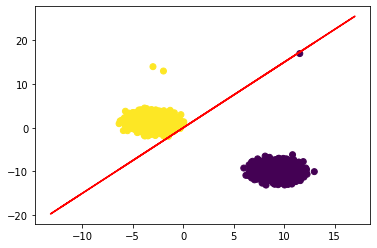

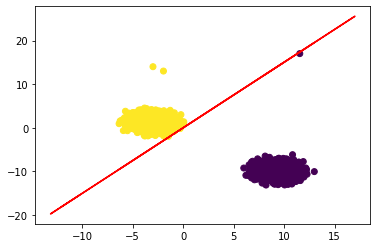

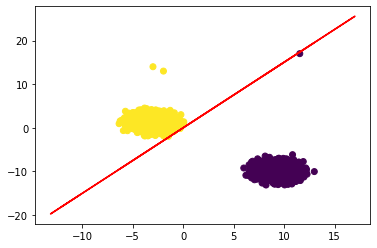

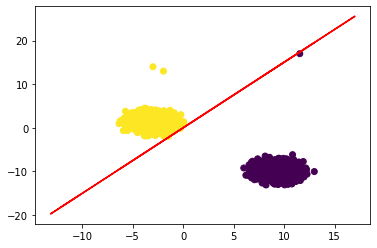

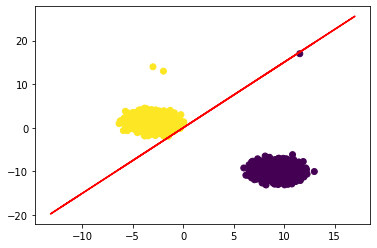

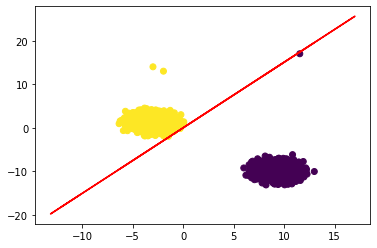

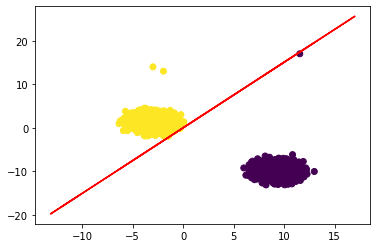

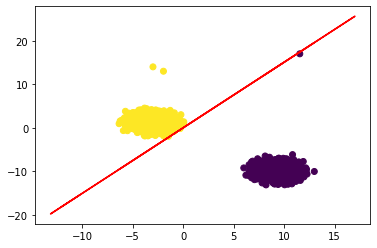

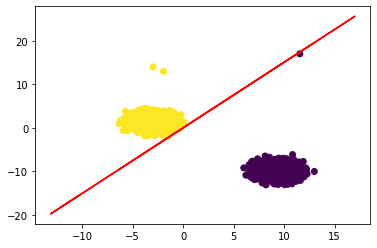

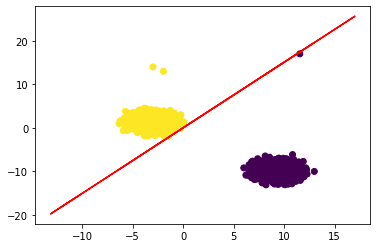

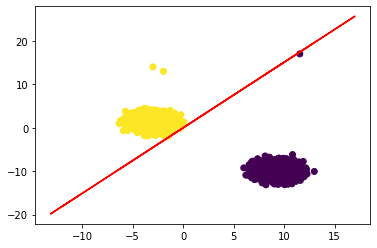

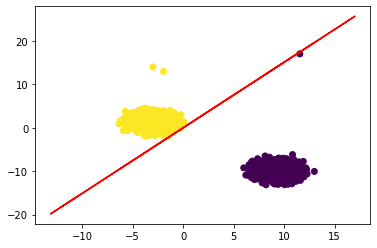

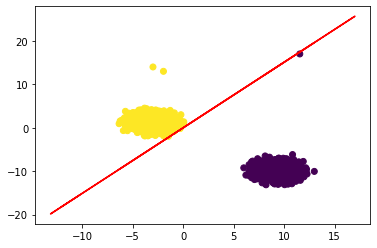

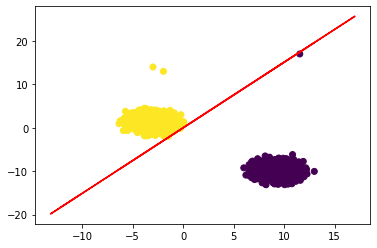

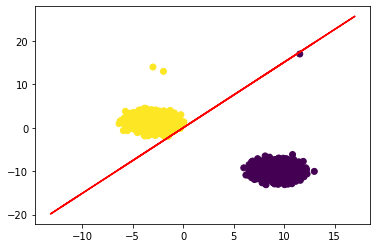

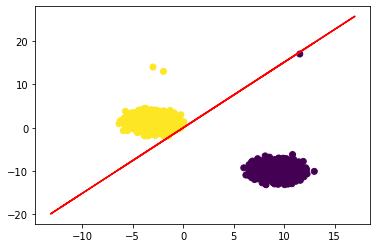

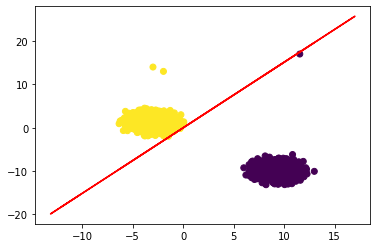

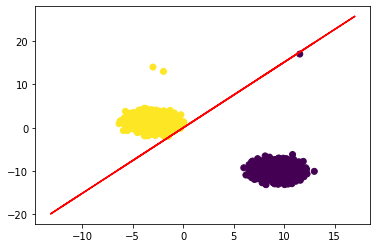

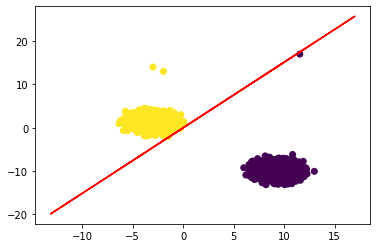

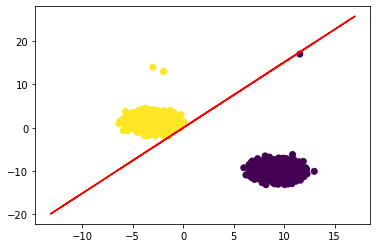

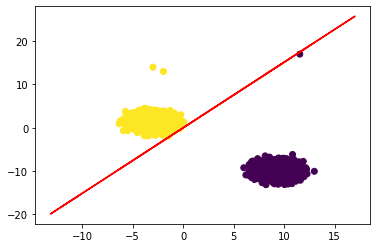

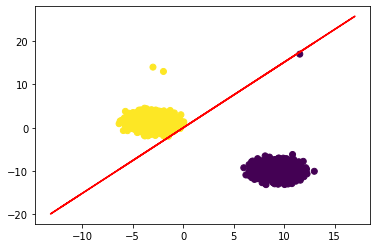

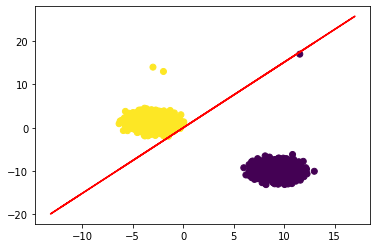

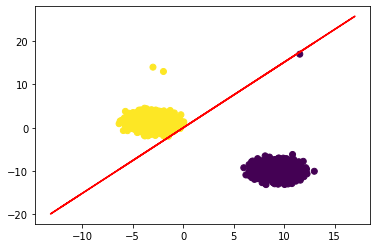

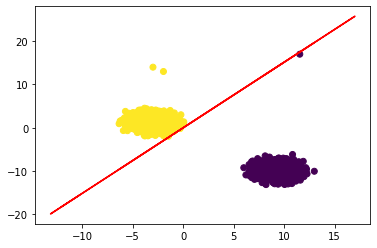

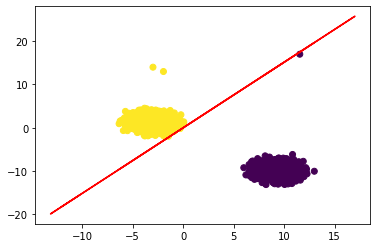

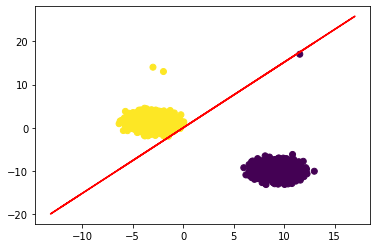

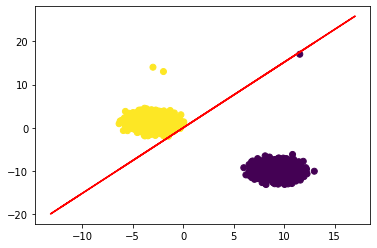

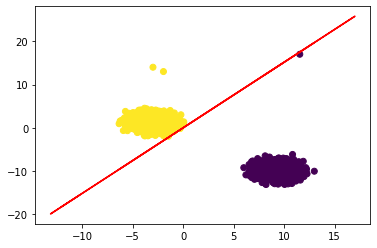

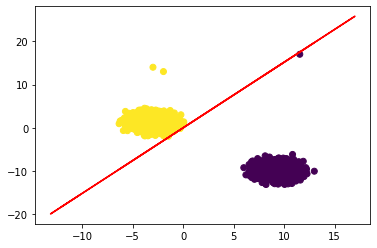

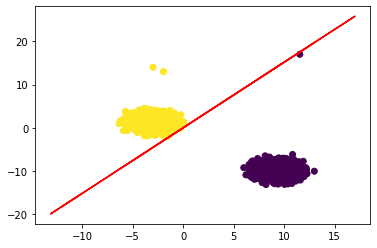

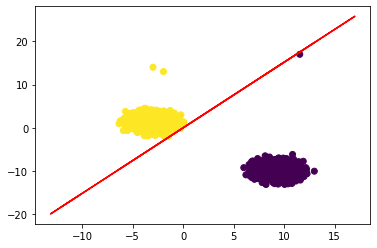

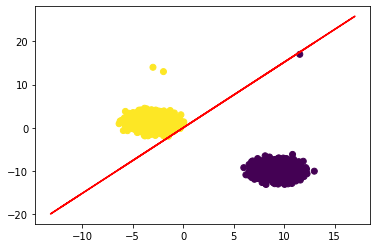

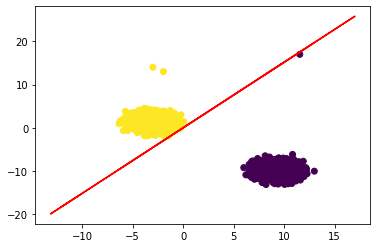

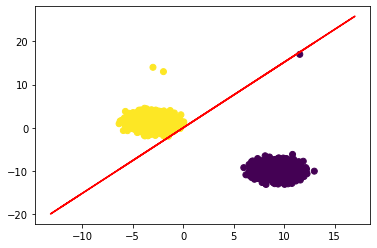

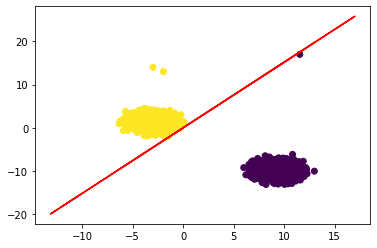

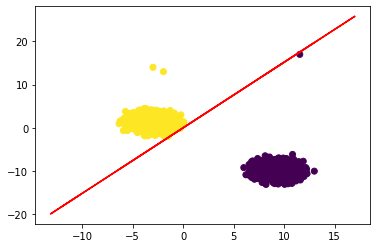

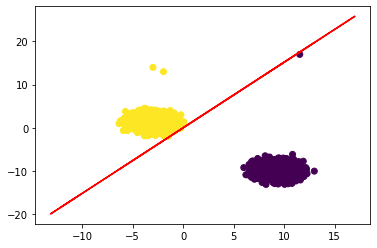

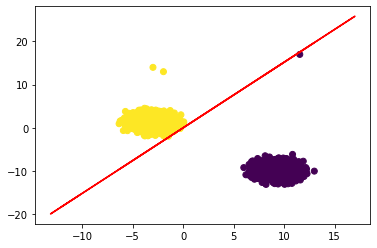

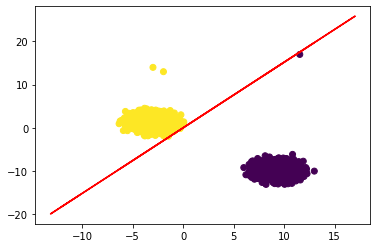

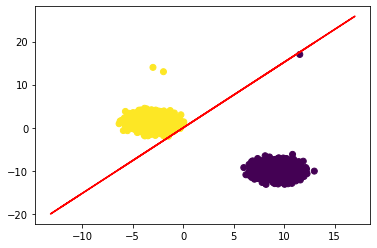

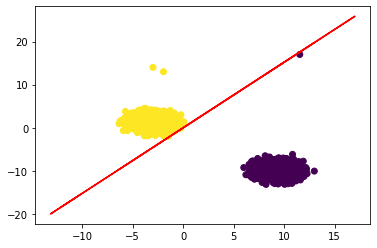

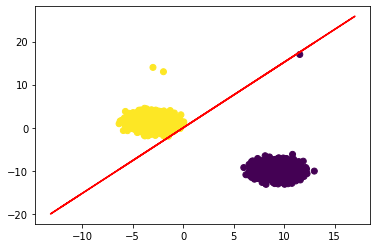

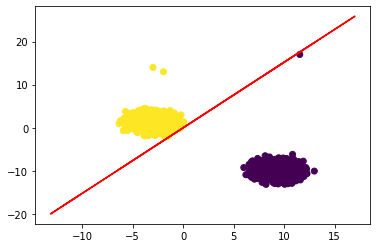

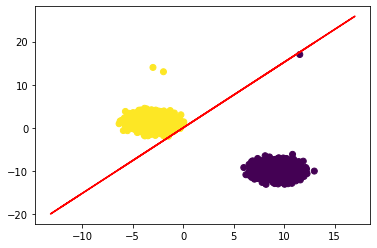

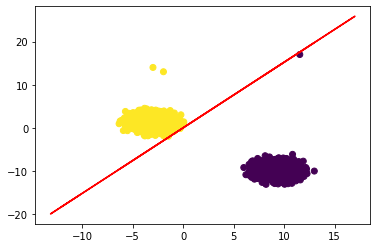

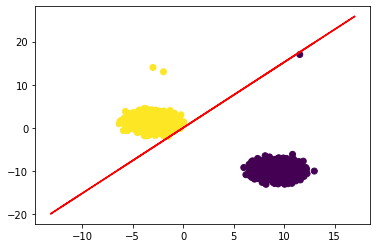

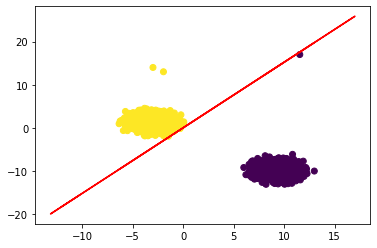

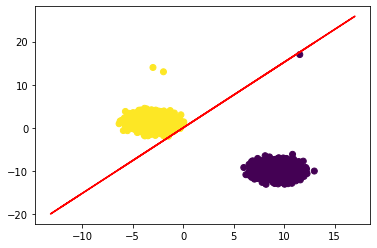

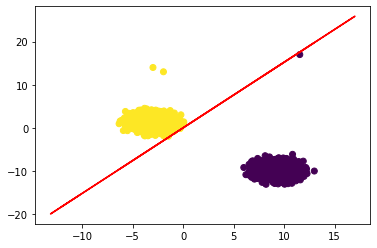

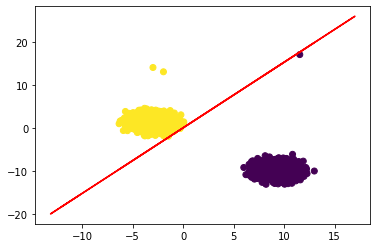

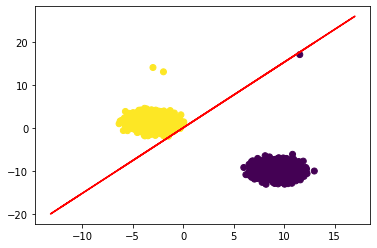

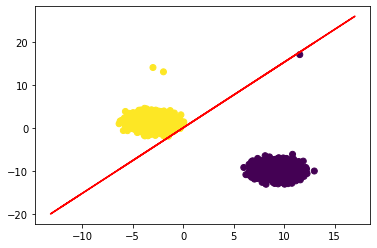

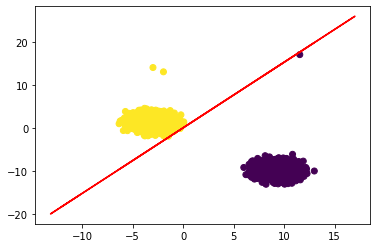

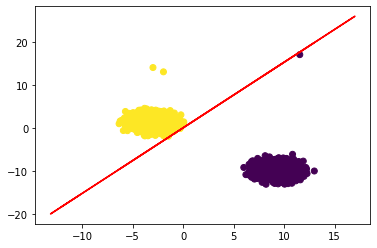

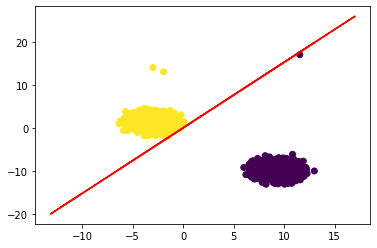

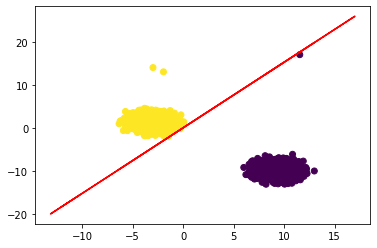

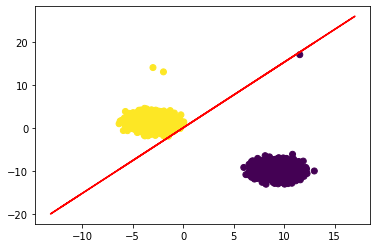

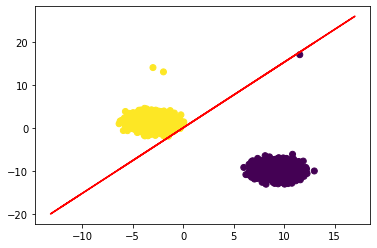

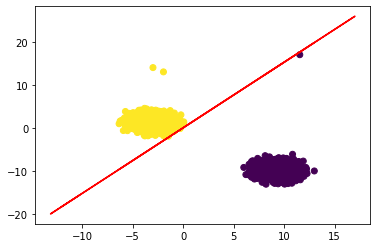

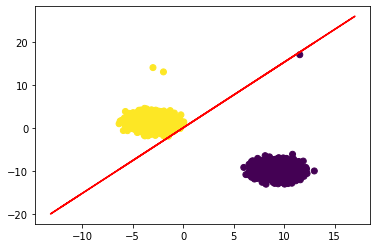

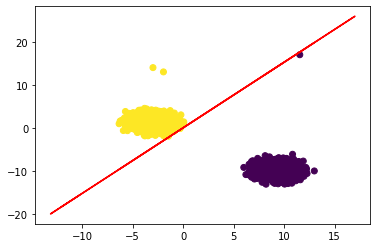

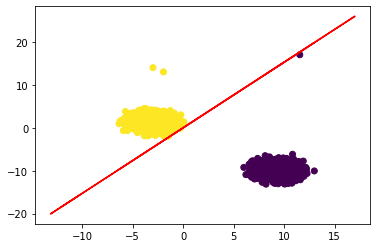

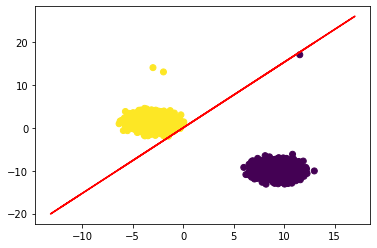

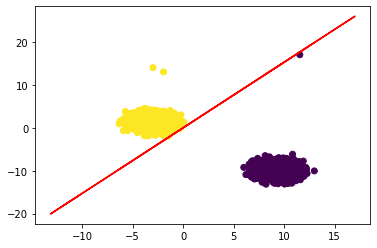

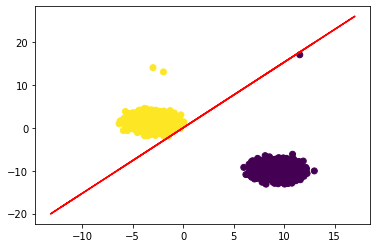

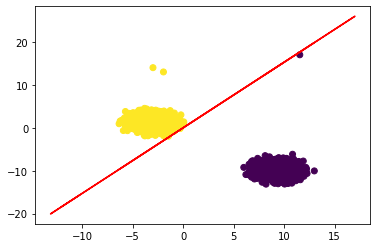

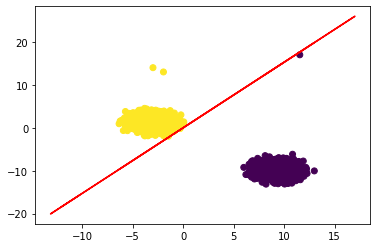

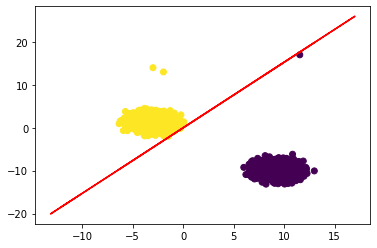

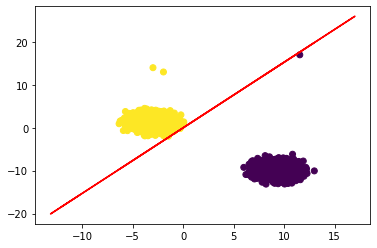

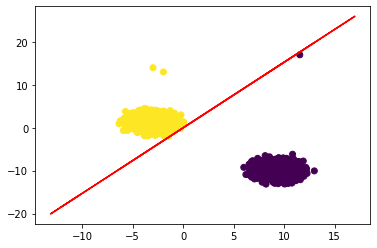

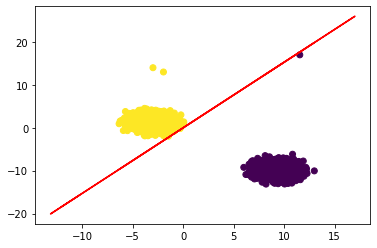

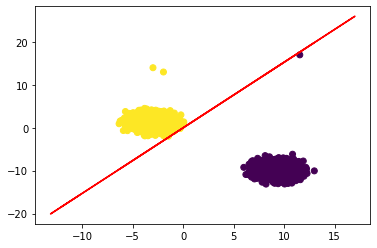

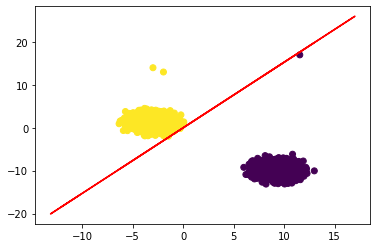

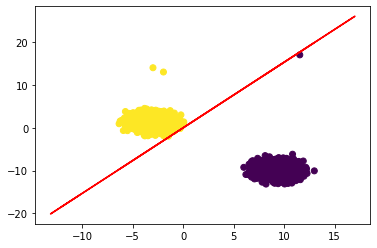

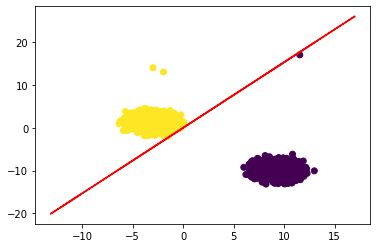

In [35]:
X_d = pd.read_csv('./Podaci/X_d.csv').to_numpy()
y_d = pd.read_csv('./Podaci/y_d.csv').to_numpy()

my_theta_d = gradient_method(X_d, y_d, 0.001, 1000, True)

Grafički prikaz

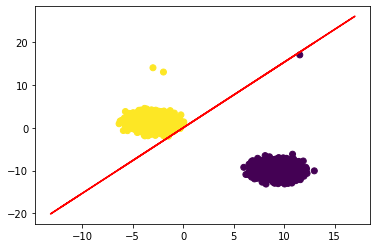

In [29]:
plt.scatter(X_d[:, 0], X_d[:, 1], c = y_d)
plt.plot(X_d, -my_theta_d[0]/my_theta_d[1] * X_d, c = 'r')
plt.show()

Na graf je jako utjecao podatak koji je bio dalje od svojeg clastera podataka